# DONUT SPRINKLES - Bias Variance Lab
Welcome to your first day on the job as a data analyist at DonutCorp! Your first task is to develop a model that can predict donut sales as a function of chocolate sprinkle density.  You will work with a data set that has been carefully gathered by diligent DonutCorp employees.  Execute the cell below to import the required libraries, load the data, and visualize it...

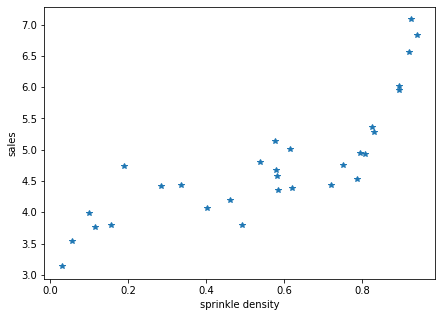

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datasource
import fit_experiments

plt.rcParams['figure.figsize'] = [7, 5]

sprinkles = np.loadtxt('data/sprinkles.csv', delimiter=',')
x = sprinkles[:, 0]
y = sprinkles[:, 1]
plt.plot(x, y, '*')
plt.xlabel('sprinkle density')
plt.ylabel('sales')
plt.show()

## Fit a Line
As a first pass, let's fit a line to the data.  That line can then be used to make predictions about the impact of sprinkle density choices...

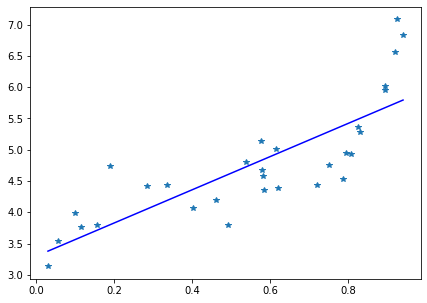

In [2]:
plt.plot(x, y, '*')
model = fit_experiments.PolynomialRegression()
model.fit(x, y, 1)
model.plot()
plt.show()

## Aside... What does it actually *mean* to "fit a line to data"?
In what sense is the line above the "best fit" for this data?  It is the line that minimizes the mean squared prediction error or MSE:

$$\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

This is the average squared error between the observed output $y_i$ and the predicted output $\hat{y}_i$.  In other words, we are selecting the line that has the lowest possible average square length for the red lines in the figure below...

The MSE for this line is: 8.88


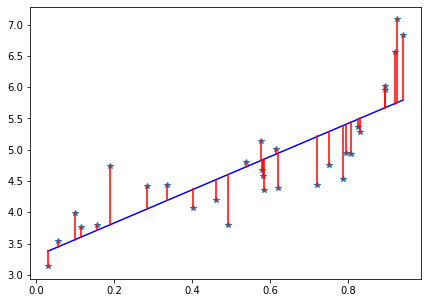

In [3]:
plt.plot(x, y, '*')
model.fit(x, y, 1)
model.plot(x, y, show_error=True)
mse = model.evaluate(x, y)
print("The MSE for this line is: {:.2f}".format(mse))
plt.show()

## SOME QUESTIONS...
* According to this model, what is the predicted sales for a sprinkle concentration of .5?
* Do you think this is a good prediction?
* Any ideas on how we might improve this model? 

## Fitting a Polynomial
There is no need to limit ourself to fitting a straight line to this data.  We can just as easily fit a polynomial of any degree.  Go back to the cell above and try modifying the third argument of the call to `fit`.  As you increase the degree of the polynomial, you should see a progressively closer fit to the data points.

## QUESTION:
* OK! Time to deploy your sales prediction system.  Go ahead and pick a polynomial degree that you think will be most effective at predicting future sales.

---

## Judgement Day

OK!  You've sent your model out into the wild.  It is being used in DonutCorp stores all over America!  Now a second set of data arrives from your intrepid data collectors. Execute the cell below to see the new set of data.  Notice that it looks a bit different from the data you have been working with. 

## QUESTIONS:

* Is this surprising?  
* *Why* might it look different?

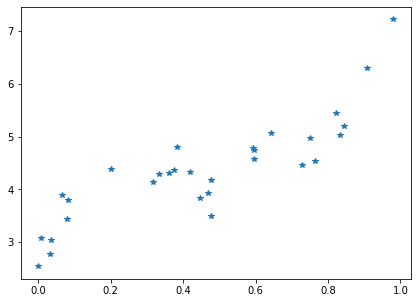

In [4]:
sprinkles_tst = np.loadtxt('data/sprinkles_test.csv', delimiter=',')
x_tst = sprinkles_tst[:, 0]
y_tst = sprinkles_tst[:, 1]
plt.plot(x_tst, y_tst, '*')
plt.show()

Let's go ahead and see how your model does on this new set of data... 

The MSE for this line is: 7.95


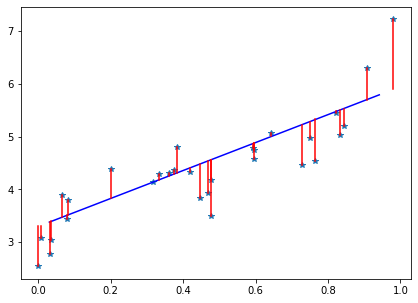

In [5]:
plt.plot(x_tst, y_tst, '*')
model.plot(x_tst, y_tst, show_error=True)
mse = model.evaluate(x_tst, y_tst)
print("The MSE for this line is: {:.2f}".format(mse))
plt.show()

## QUESTIONS:

* Is this good?
* Is there some way we could have used our original data to create a model that would have performed better?
* Did we make the right choice when we chose the degree of our polynomial?

## WARNING We Venture Now Into The Realm of the Thought Experiment


Let's assume that an infinitely intelligent space alien beams in and shows us the TRUE relationship between sprinkle concentrations and sales. It turns out that sprinkle sales are governed by the formula
$$ y = f(x) + \epsilon$$

where $\epsilon$ is a random variable drawn from the normal distribution $\mathcal{N}(0, .07)$  The function $f(x)$ captures the "true" relationship between sprinkles and sales, while the a $\epsilon$ term captures the fact that sales are inherently unpredictible if all we are working from is the concentration of sprinkles.

It is a common assumption in statistical machine learning that our data source has this form: some "true" underlying function corrupted by random noise.  Execute the cell below to see $f(x)$.


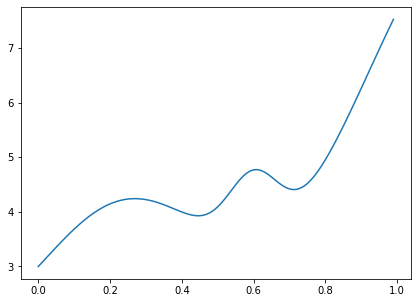

In [6]:
ds = datasource.DataSource()
xs = np.arange(0, 1,.01)
ys = ds.true_fun(xs)
plt.plot(xs, ys)
plt.show()

In the real world we *never actually have access to $f(x)$*.  Instead, we get noisy data drawn from some unknown underlying distribution.  The goal is to minimize the *expected* squared error of our fit: $$E[(y - \hat{f}(x))^2]$$
Where $\hat{f}(x)$ is our estimate, and the expectation is taken over the choice of traning set... In other words this describes the average error we would expect to see if we repeatedly pulled data sets from our underlying distribution, fit a model, then used that model to make predictions.

We won't do the derivation here, but it turns out that expected error can be broken down into three components: 
$$E[(y - \hat{f}(x))^2] = (Bias[\hat{f}(x)])^2 + Variance[\hat{f}(x)] + \sigma^2$$

where

$Bias[\hat{f}(x)] = E[\hat{f}(x)] - f(x)$,

$Variance[\hat{f}(x)] = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$,

and

$\sigma^2$ is the variance of the noise term


To make this concrete, let's look at what happens when we repeatedly fit a polynomial to different data sets drawn from the same underlying (sprinkle) source...


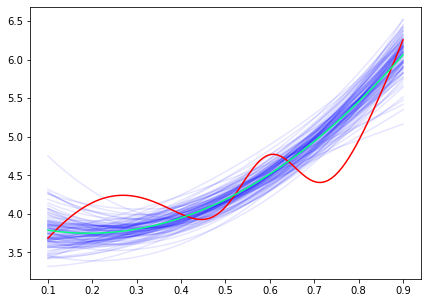

mean squared bias: 0.1115
mean variance: 0.0214


In [7]:
mean_sqrd_bias, mean_var = fit_experiments.bias_variance_experiment(100, 30, 2, ds, display=True)

The many blue lines in this figure represent many possible least-squares fits, each one for a different data set drawn from the true distribution.  The light green line represents the average of all of these fits: $E[\hat{f}(x)]$.  The red line represents the true data function $f(x)$.  Referring back to our bias variance decomposition, expected error is the sum of three sources: 
1. Squared bias, $(E[\hat{f}(x)] - f(x))^2$, is related the difference between the light green line and the red line.  If we have a large squared bias, that means that our average model is bad, even when it is averaged across many attempts.
2. Variance $E[(\hat{f}(x) - E[\hat{f}(x)])^2]$ is a measure of how spread out our individual models are relative to our average model.  Large variance means that we learn a radically different model depending on which data set we happen to learn from.
3. Irreducible error $\sigma^2$ comes from the fact that the system we are trying to model has an inherently random component that is fundamentally un-learnable.

Since we can't do anything about irreducible error, our goal is to minimize both bias and variance.  Unfortunately, decreasing bias tends to increase variance and vice-versa. This is often described as the bias/variance dilemma and is a central challenge in machine learning.  Go ahead and re-run the experiment in the cell above a few times with different degrees for the polynomial fit (third argument).  

QUESTION: 
* How does changing the degree of the polynomial impact the bias and variance values? 
---

Now let's try systematically evaluating the bias and variance as we modify the degree of the polynomial...

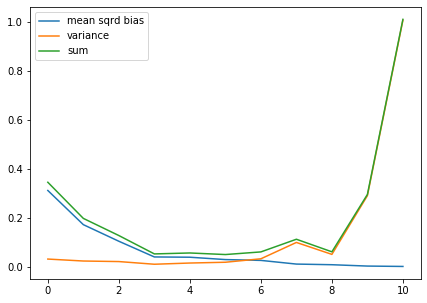

In [8]:
fit_experiments.tune_experiment(1000, 30, 0, 11, ds)

## QUESTIONS?
* Do these results match your intuitions?
* Given these results, what degree polynomial should we have used for our original learning problem?
* Is an experiment like this apractical approach to bias/variance tuning?  Why or why not?
* Try re-running the experiment above with larger or smaller data sets.  How does changing the size of the training set impact the bias and variance?